### **Author Name:-Geoffrey George Daniel**


### **Task 1**

###**Domain:** Data Science & Business Analytics Intern

**Task Type:** Simple Linear Regression

**Task:** Predict the percentage of a student based on the no. of study hours using supervised ML algorithm.

**Steps Performed:**
1. Import Libraries.
2. Import dataset.
3. Exploratory Data Analysis
4. Data Pre-processing
5. Linear Regression Model Construction
6. Conclusion

## **1. Importing necessary libraries**




In [1]:
import pandas as pd                 #for data manipulation and analysis
import numpy as np                  #for calculations
import matplotlib.pyplot as plt     #for plotting
%matplotlib inline


## **2. Importing data using a link**

In [2]:
link = "http://bit.ly/w-data"     #dataset link
data = pd.read_csv(link)    #reads the csv file and stores it in the variable data

**Displaying 10 Records**

In [3]:
print("Displaying the imported data")
data.head(10)   #displays first 10 records of the dataset

Displaying the imported data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **3. EXPLORATORY DATA ANALYSIS**

## **Dataset Description**

In [4]:
print(data.columns)   #displays the columns of the data

Index(['Hours', 'Scores'], dtype='object')



### **Interpretation:**
**The dataset consists of 2 columns namely Hours and Scores.**

## **Dataset Shape**

In [5]:
print("Shape of the dataset:",data.shape)

Shape of the dataset: (25, 2)


**Interpretation:**

**The dataset consists of 25 rows and 2 columns**

## **Dataset Information**

In [6]:
import warnings
warnings.filterwarnings('ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Interpretation:**

**The dataset consists of 2 columns each with 25 non-null values. Column 'Hours' is of datatype float and 'Scores' is of the datatype int.**


## **Statistical Description of Dataset**

In [7]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **4. DATA PRE-PROCESSING**

### **Checking for duplicate records**

In [8]:
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 2)


**Interpretation:**

**The dataset consists of no duplicate records.**

## **Checking for null values**

In [9]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


**Interpretation:**

**The dataset consists of no null or missing values. Therefore data-preprocessing is not required on this dataset.**

## **Data Visualization**

**Plotting hours and scores**

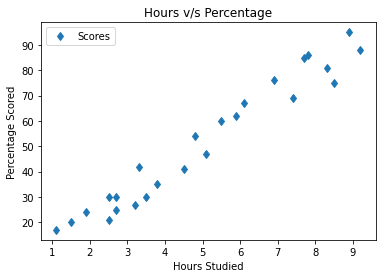

In [10]:
data.plot(x='Hours',y='Scores', style='d')        #plotting
plt.title('Hours v/s Percentage')   #title of the plot
plt.xlabel('Hours Studied')         #label of x-axis
plt.ylabel('Percentage Scored')     #label of y-axis
plt.show()                          #display the plot

**Interpretation:**

**From the above graph, it is clear that both 'Hours' and 'Percentage' are linearly dependent i.e. as the number of study hours increases, the percentage scored also increases.**

## **5. MODEL CONSTRUCTION STEPS**

i. Splitting data into training set and test set

ii. Model training using training data

iii. Plotting regression line

iv. Model prediction using test data

v. Model Evaluation 

### **i. Train-test Split**

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)  #80% - training data, 20% - testing data

### **ii. Model Training**

In [12]:
#fitting data into model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)
print()

### **iii.Regression Line**

In [13]:
pred_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### **Plotting Regression Line**

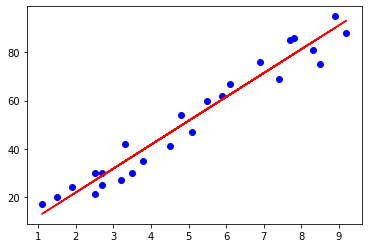

In [14]:
regression_line = regression.coef_*X+regression.intercept_

plt.scatter(X,y,color='blue')     #scatter plot of data points in blue color 
plt.plot(X,regression_line,color='red')   #regression line in red color
plt.show()        #display plot

### **Correlation between 'Hours' and 'Scores'**

In [15]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000



**Interpretation:**

**The variables 'Hours' and 'Scores' are positively correlated.**

### **iv. Model Prediction**

In [16]:
print(X_test)   #test data
y_predict = regression.predict(X_test)      #predicting scores(y) using x-test data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Predicting score based on the number of hours**

In [17]:
hours = [9.25]
score_predicted = regression.predict([hours])
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(round(score_predicted[0],2)))

Number of hours = [9.25]
Predicted Score = 93.69


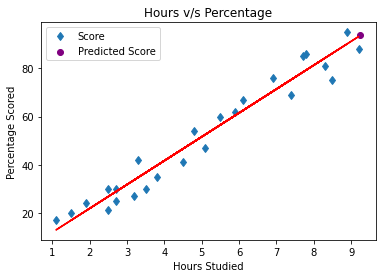

In [18]:
data.plot(x='Hours',y='Scores', style='d',label='Score')        
hour = [9.25]
score = [score_predicted[0]]
plt.scatter(hour,score,color='purple',label='Predicted Score')      #scatter plot of the predicted score
plt.plot(X,regression_line,color='red')       #plotting regression line
plt.title('Hours v/s Percentage')   #title of the plot
plt.xlabel('Hours Studied')         #label of x-axis
plt.ylabel('Percentage Scored')     #label of y-axis
plt.legend()
plt.show()                          #display the plot

## **v. Model Evaluation**

**Comparing Actual and Predicted values**

In [19]:
compare = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Calculating Mean Absolute Error**

In [20]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_predict))

Mean Absolute Error: 4.183859899002982


**Interpretation:**

**Mean absolute error is the measure of average of the amount of error. Lower value of better prediction. Here the value is 4.18 which is good as it is very low.**

## **6. Conclusion**

## **With respect to simple linear regression model, if a student studies for more than 9.25 hours per day then that student is most likely to score a percentage of 93.69.**
